## The assignment is to plot a Logistic Regression for the csv file IPL2016.csv. <br>
### It is a file containing the strike rate of AB De Villiers and Virat Kohli collectively in each match in IPL 2016, with if RCB won or lost the match. Won has been represented with 1, and Lost with 0(File has been cleaned, cause that is not the purpose of the assignment). 
### You're assignment is to find a function, such that if we input the collective strike rate of ABD and VK, we can get an accurate probability of RCB winning the match.

### This is a Logistic Regression problem. <br>
### We have basically $Y_i \stackrel{i.i.d.} \sim Bern(\frac{e^{\beta^T \vec{X_i}}}{1 + e^{\beta^T \vec{X_i}}})$

Hint : Maximising a Function is the same as minimising the negative Function.

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [372]:
df = pd.read_csv("IPL2016.csv")
x0 = np.array(df["overall_sr"])/200         #normalising data
y0 = np.array(df["won"])

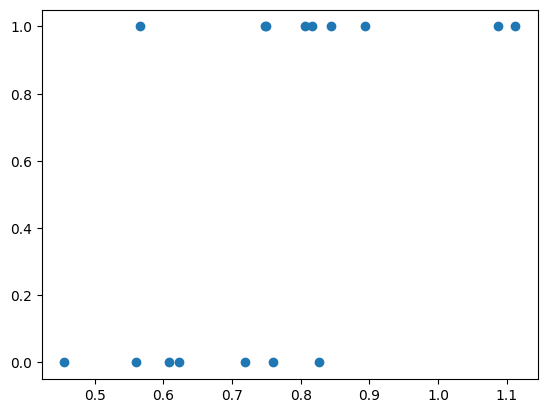

In [373]:
plt.scatter(x0, y0)
plt.show()

In [374]:
m = np.random.rand()
c = np.random.rand()

x = m*x0 + c
y_pred = 1/(1 + np.exp(-m*x0 + c))

print(y_pred)

[0.37107145 0.3706717  0.36550791 0.36879748 0.36907528 0.36585086
 0.36438551 0.37223819 0.36885153 0.361948   0.37742598 0.37043353
 0.376817   0.36452707 0.37017505 0.36813336]


In [375]:
def loss (x0, y0, y_pred):
    l = - np.sum( y0 * np.log(y_pred) + (1 - y0) * np.log(y_pred))
    return l

def derib0 (x0,y0,y_pred):
    return -np.sum(x0 * (y0 -y_pred))

def derib1 (y0,y_pred):
    return -np.sum(y0 - y_pred)


def gd(x0, y, m, c) : 
    for i in range(10000):
        x = m * x0 + c
        y_pred = 1/(1 + np.exp(-x))
        m = m - 1e-1 * derib0(x0, y, y_pred)
        c = c - 1e-1 * derib1(y, y_pred)
    return m, c
 
m, c = gd(x, y0, np.random.rand(), 0)
print(m, c)


37.16775285211778 -25.361583711155987


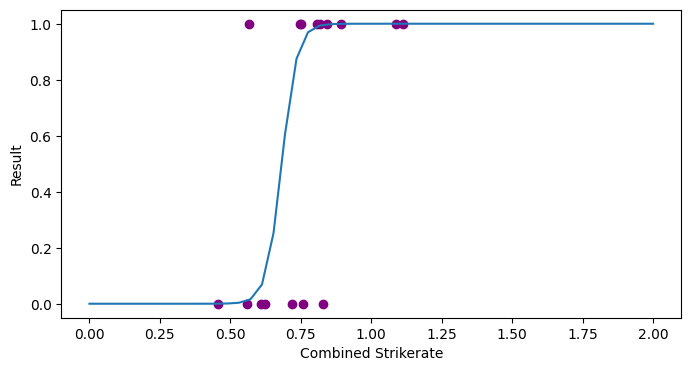

In [378]:

figure = plt.figure(figsize=(8, 4))
ax = figure.add_subplot(111)

scatter = ax.scatter(x0, y0, c='purple')

ax.set_xlabel('Combined Strikerate')
ax.set_ylabel('Result')

X_axis = np.linspace(0,2)
plot_sigmoid = ax.plot(X_axis, 1/(1 + np.exp(-(m*X_axis+c))))

plt.show()
